In [3]:
import scipy
import sklearn
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# K近邻分类

In [4]:
from sklearn.datasets.samples_generator import make_blobs

In [5]:
centers = [[1,2],[3,4],[0,1]]
X, y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.6)

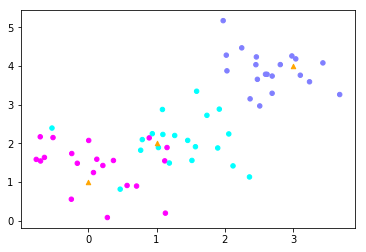

In [9]:
plt.scatter(X[:,0],X[:,1],s=20,c=y,cmap='cool')
c = np.array(centers)
plt.scatter(c[:,0],c[:,1],s=20,c='orange',marker='^')

In [10]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
X_sample = np.array([[0,2],])
y_sample = clf.predict(X_sample)
neighbors = clf.kneighbors(X_sample,return_distance=False)

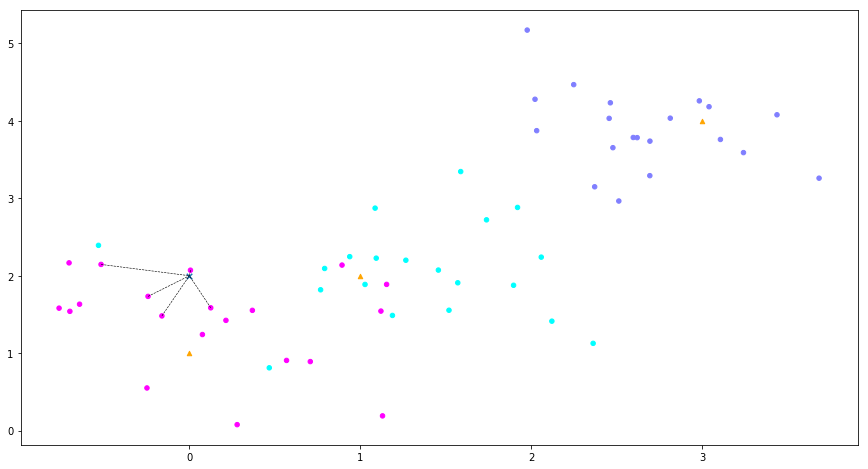

In [32]:
plt.figure(figsize=(15,8))
plt.scatter(X[:,0],X[:,1],s=20,c=y,cmap='cool')
plt.scatter(c[:,0],c[:,1],s=20,c='orange',marker='^')
plt.scatter(X_sample[0,0],X_sample[0,1],marker='x',s=30,cmap='cool')

for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0,0]],[X[i][1],X_sample[0,1]],'k--',linewidth=0.6)

In [33]:
neighbors

array([[22, 14, 13, 43, 49]])

# K近邻回归

In [34]:
n_dots = 40
X = 5 * np.random.rand(n_dots,1)
y = np.cos(X).ravel()
y += 0.2 * np.random.rand(n_dots) - 0.1

In [36]:
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn = KNeighborsRegressor(k)
knn.fit(X,y);

In [39]:
T = np.linspace(0,5,500)[:,np.newaxis]
y_pred = knn.predict(T)
knn.score(X,y)

0.9878941995539491

Text(0.5, 1.0, 'KNeighborsRegressor (k=5)')

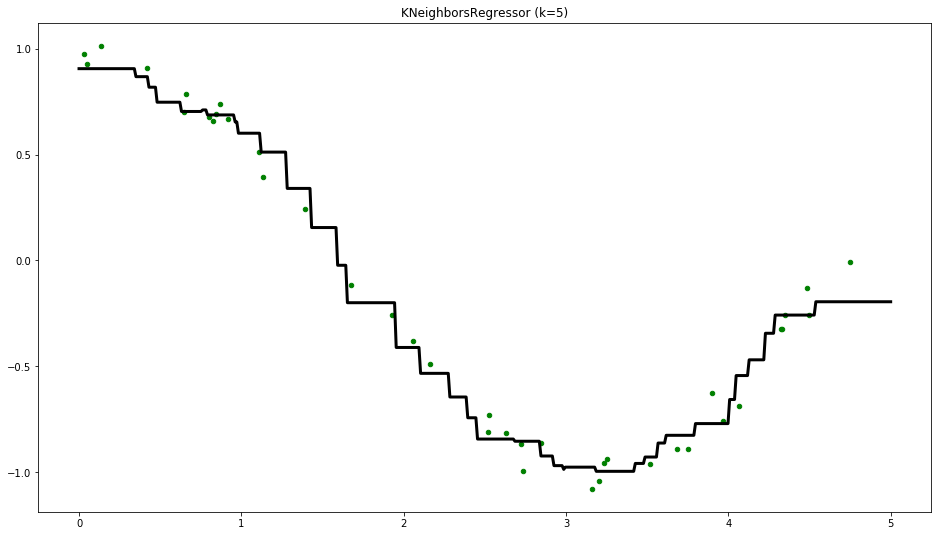

In [42]:
plt.figure(figsize=(16,9))
plt.scatter(X,y,c='g', label='data',s=20)
plt.plot(T,y_pred,c='k',label='preiction',lw=3)
plt.axis('tight')
plt.title('KNeighborsRegressor (k=%i)' % k)